###  IMPORT LIBRARIES


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
digits = load_digits()
X = digits.data          
y = digits.target

X.shape

(1797, 64)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
components_list = [2, 10, 30, 50]
explained_variance = {}

for n in components_list:
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled)
    explained_variance[n] = np.sum(pca.explained_variance_ratio_)

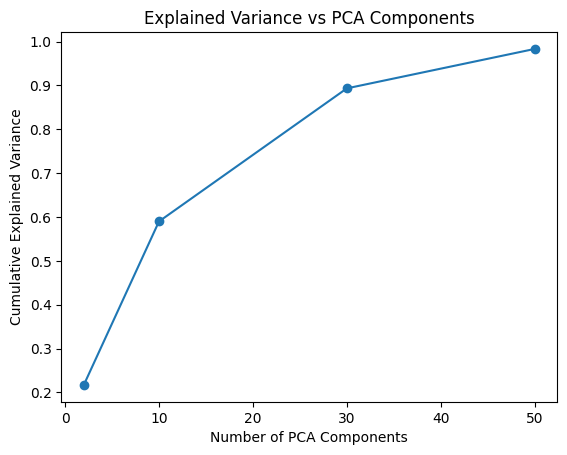

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure()
plt.plot(list(explained_variance.keys()), list(explained_variance.values()), marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs PCA Components")
plt.show()
plt.savefig("explained_variance.png")

In [13]:
best_n = 30
pca = PCA(n_components=best_n)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Reduced shape:", X_train_pca.shape)

Reduced shape: (1437, 30)


In [15]:
lr_pca = LogisticRegression(max_iter=5000)
lr_pca.fit(X_train_pca, y_train)

y_pred_pca = lr_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

In [16]:
lr_original = LogisticRegression(max_iter=5000)
lr_original.fit(X_train_scaled, y_train)

y_pred_original = lr_original.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred_original)

print("Accuracy (Original Data):", acc_original)
print("Accuracy (PCA Reduced Data):", acc_pca)

Accuracy (Original Data): 0.9722222222222222
Accuracy (PCA Reduced Data): 0.9555555555555556


In [17]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_train_scaled)

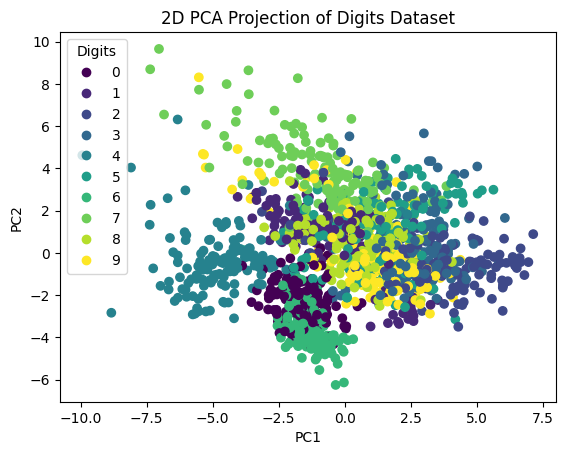

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure()
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Projection of Digits Dataset")
plt.legend(*scatter.legend_elements(), title="Digits")
plt.show()
plt.savefig("pca_2d.png")